In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder  
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'hours-per-week', 'Native-country',
       'Salary'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip()

In [5]:
#Checking for Null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
hours-per-week    0
Native-country    0
Salary            0
dtype: int64

### Understanding the Dependent Variable

In [6]:
df['Salary'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Salary, dtype: object

In [7]:
df['Salary'].head(20)

0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
5      <=50K
6      <=50K
7       >50K
8       >50K
9       >50K
10      >50K
11      >50K
12     <=50K
13     <=50K
14      >50K
15     <=50K
16     <=50K
17     <=50K
18     <=50K
19      >50K
Name: Salary, dtype: object

In [8]:
#Converting the 2 string outcome to integer
le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

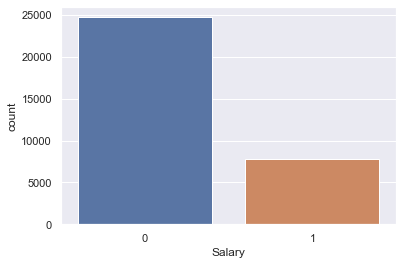

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Salary'])

We can use different methods to deal with imbalanced data. 
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In this experiment, we will be using downsampling as the method to deal with imbalanced data.

In [10]:
from sklearn.utils import resample

salaryNeg = df[df["Salary"] == 0]
salaryPlus = df[df["Salary"] == 1]


salaryNeg_downsample = resample(salaryNeg,
             replace=True,
             n_samples=len(salaryPlus),
             random_state=42)

df_downsampled = pd.concat([salaryNeg_downsample, salaryPlus])


<AxesSubplot:xlabel='Salary', ylabel='count'>

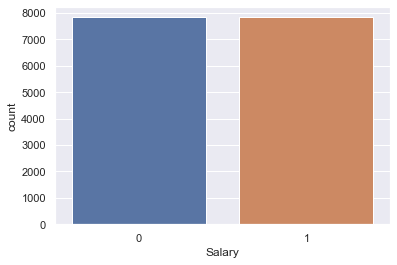

In [11]:
sns.countplot(df_downsampled['Salary'])

In [12]:
df_downsampled.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
hours-per-week     int64
Native-country    object
Salary             int64
dtype: object

In [13]:
df_downsampled.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Salary
31119,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
20745,18,Local-gov,159032,7th-8th,4,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
1127,63,Federal-gov,124244,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,0
7101,37,Private,120045,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,56,United-States,0
28380,40,Private,72791,Some-college,10,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,0


In [19]:
df_downsampled.nunique()

Age                  72
Workclass             9
Fnlwgt            11059
Education            16
Education-num        16
Marital-status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-gain        105
Capital-loss         73
hours-per-week       89
Native-country       41
Salary                2
dtype: int64

### Understanding the Relationship with Other Features

https://seaborn.pydata.org/tutorial/categorical.html

<AxesSubplot:xlabel='Salary', ylabel='Age'>

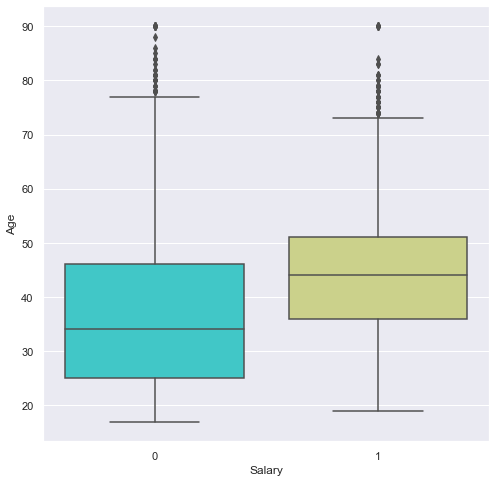

In [20]:
#1. Age
plt.figure(figsize=(8,8))
sns.boxplot(x='Salary',y='Age',data=df_downsampled, palette='rainbow')

<AxesSubplot:xlabel='Salary', ylabel='Age'>

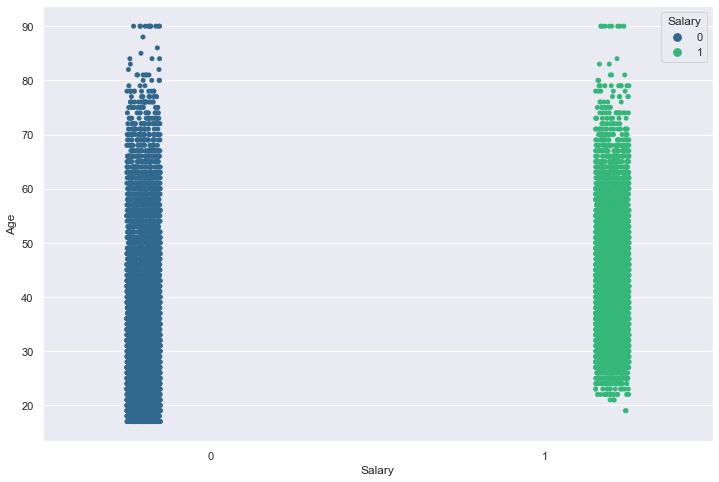

In [15]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Salary', y='Age', data=df_downsampled, jitter=True, hue='Salary', dodge=True, palette='viridis')

We can conclude that people start to earn higher salaries after around 25 years of age. 

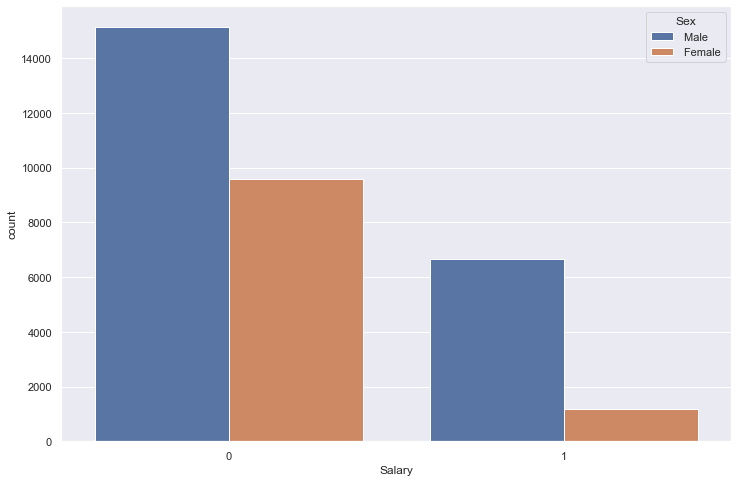

In [28]:
#2. Sex
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Salary', hue='Sex')
plt.show()

<AxesSubplot:ylabel='Sex'>

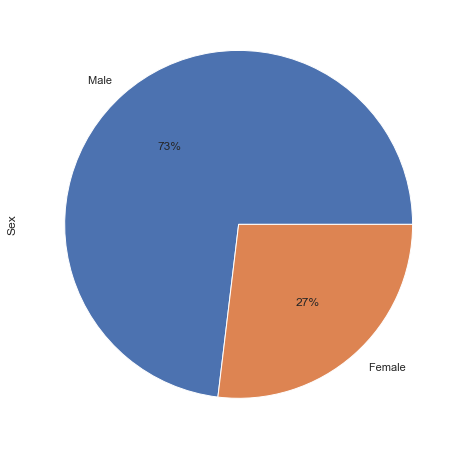

In [35]:
plt.figure(figsize=(12,8))
df_downsampled['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Even though significant number of high earners are men, when we considered the sample size distribution it is clear that 73% of the entries in the sample are Male hence we can conclude that we need a better even representation of gender when sampling. 

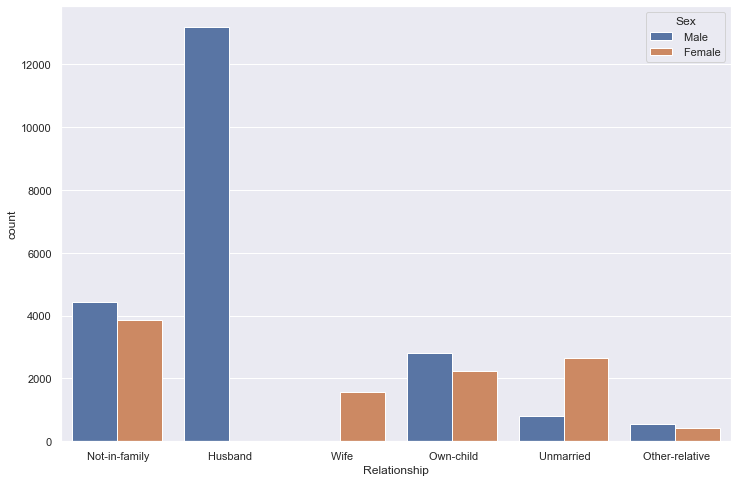

In [36]:
#2. Relationship
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Relationship', hue='Sex')
plt.show()

The graph indicates married males are earning higher compared to married females and unmarried females are earning higher than the unmarried males.

# Using Categorical and Continuous Data together and Fit Model

In [46]:
target = df_downsampled['Salary']

data = df_downsampled.drop(columns=['Salary'])

In [47]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore") #handle_unknown="ignore" to solve the potential issues due to rare categories.
numerical_preprocessor = StandardScaler()

In [49]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

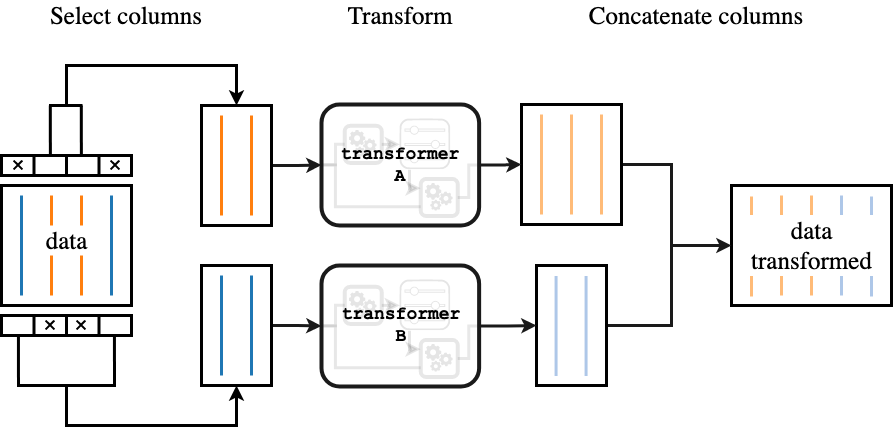

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [43]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital-status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex',
                                                   'Native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'Fnlwgt',
                                                   'Education-num',
                                                   'Capital-gain',
                                                   'Capital-loss',
                                                   'hours-per-week',
                                                   'Salary'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [51]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [53]:
_ = model.fit(data_train, target_train)

In [54]:
model.predict(data_test)[:5]

array([0, 1, 0, 1, 1])

In [55]:
target_test[:5]

5755     1
30638    0
5043     0
8909     1
20340    1
Name: Salary, dtype: int64

In [60]:
round(model.score(data_test, target_test),2)*100

82.0